In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tensorflow.keras import activations
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Softmax
import itertools 
from tensorflow.keras import layers
from tensorflow import keras

#from google.colab import drive
#drive.mount('/content/drive')

# Load EEG Data

In [2]:
##From .mat format to numpy##
#Using NMED-T .mat files previously split into 1 minute files 

#Minute 1
os.chdir('/content/drive/My Drive/EEG_DL/NMED_T/agg_data')

files = [item for item in os.listdir(os.getcwd())]
files.sort()

print(files)

['1.mat', '10.mat', '2.mat', '3.mat', '4.mat', '5.mat', '6.mat', '7.mat', '8.mat', '9.mat']


In [3]:
eeg = [loadmat(files[i]) for i in range(len(files))]

print(eeg[0].keys())

eeg_crop = [eeg[i]['short'] for i in range(len(eeg))]
vals = [eeg_crop[i][0,0] for i in range(len(eeg_crop))]
vals = np.array(vals)

dict_keys(['__header__', '__version__', '__globals__', 'short'])


In [4]:
#Minute 2
os.chdir('/content/drive/My Drive/EEG_DL/NMED_T/agg_data2')

files2 = [item for item in os.listdir(os.getcwd())]
files2.sort()

print(files2)

['1.mat', '10.mat', '2.mat', '3.mat', '4.mat', '5.mat', '6.mat', '7.mat', '8.mat', '9.mat']


In [5]:
eeg2 = [loadmat(files2[i]) for i in range(len(files2))]

print(eeg2[0].keys())

eeg_crop2 = [eeg2[i]['short'] for i in range(len(eeg2))]
vals2 = [eeg_crop2[i][0,0] for i in range(len(eeg_crop2))]
vals2 = np.array(vals2)

dict_keys(['__header__', '__version__', '__globals__', 'short'])


In [6]:
#Minute 3
os.chdir('/content/drive/My Drive/EEG_DL/NMED_T/agg_data3')

files3 = [item for item in os.listdir(os.getcwd())]
files3.sort()

print(files3)

['1.mat', '10.mat', '2.mat', '3.mat', '4.mat', '5.mat', '6.mat', '7.mat', '8.mat', '9.mat']


In [7]:
eeg3 = [loadmat(files3[i]) for i in range(len(files3))]

print(eeg3[0].keys())

eeg_crop3 = [eeg3[i]['short'] for i in range(len(eeg3))]
vals3 = [eeg_crop3[i][0,0] for i in range(len(eeg_crop3))]
vals3 = np.array(vals3)

dict_keys(['__header__', '__version__', '__globals__', 'short'])


In [8]:
#Minute 4
os.chdir('/content/drive/My Drive/EEG_DL/NMED_T/agg_data4')

files4 = [item for item in os.listdir(os.getcwd())]
files4.sort()
files4.pop(0)

print(files4)

['1.mat', '10.mat', '2.mat', '3.mat', '4.mat', '5.mat', '6.mat', '7.mat', '8.mat', '9.mat']


In [9]:
eeg4 = [loadmat(files4[i]) for i in range(len(files4))]

print(eeg4[0].keys())

eeg_crop4 = [eeg4[i]['short'] for i in range(len(eeg4))]
vals4 = [eeg_crop4[i][0,0] for i in range(len(eeg_crop4))]
vals4 = np.array(vals4)

dict_keys(['__header__', '__version__', '__globals__', 'short'])


# Train, Validation, Test split

In [10]:
min1 = []

for i in range(len(vals)):
    for j in range(len(vals[i])):
      min1.append(np.transpose(vals[i][j]))
      
min1 = np.array(min1)
min1 = min1.astype('float32')
print(min1.shape)


min2 = []
for i in range(len(vals2)):
    for j in range(len(vals2[i])):
      min2.append(np.transpose(vals2[i][j]))
      
min2 = np.array(min2)
min2 = min2.astype('float32')
print(min2.shape)


min3 = []
for i in range(len(vals3)):
    for j in range(len(vals3[i])):
      min3.append(np.transpose(vals3[i][j]))
    
min3 = np.array(min3)
min3 = min3.astype('float32')
print(min3.shape)


min4 = []
for i in range(len(vals4)):
    for j in range(len(vals4[i])):
      min4.append(np.transpose(vals4[i][j]))
      

min4 = np.array(min4)
min4 = min4.astype('float32')
print(min4.shape)

(200, 7500, 125)
(200, 7501, 125)
(200, 7500, 125)
(200, 7500, 125)


In [11]:
min2 = np.delete(min2,0,1)
#min2_T = np.delete(min2_T,0,1)
print(min2.shape)

vals = []
vals2 = []
vals3 = []
vals4 = []

(200, 7500, 125)


In [12]:
#Divide into 30 sec chunks and assign across train, val, test sets
sr = 125
samp = sr*30

chunk1 = [min1[i][0:samp] for i in range(len(min1))]
chunk2 = [min1[i][samp:samp*2] for i in range(len(min1))]

chunk3 = [min2[i][0:samp] for i in range(len(min2))]
chunk4 = [min2[i][samp:samp*2] for i in range(len(min2))]

chunk5 = [min3[i][0:samp] for i in range(len(min3))]
chunk6 = [min3[i][samp:samp*2] for i in range(len(min3))]

chunk7 = [min4[i][0:samp] for i in range(len(min4))]
chunk8 = [min4[i][samp:samp*2] for i in range(len(min4))]

#min1 = []
#min2 = []
#min3 = []
#min4 = []

In [13]:
X_train = [chunk7]+[chunk1]+[chunk6]+[chunk4]
X_train = np.array(X_train)
X_train = np.concatenate(X_train)



X_val = [chunk8]+[chunk2]
X_val = np.array(X_val)
X_val = np.concatenate(X_val)



X_test = [chunk5]+[chunk3]
X_test = np.array(X_test)
X_test = np.concatenate(X_test)

chunk1 = []
chunk2 = []
chunk3 = []
chunk4 = []


print(X_train.shape,X_val.shape,X_test.shape)

(800, 3750, 125) (400, 3750, 125) (400, 3750, 125)


# Channel Order Selection 

In [15]:
from scipy.signal import hilbert

#Get EEG amplitude accross channels
X_env = []
for i in range(len(X_train)):
  x = []
  for j in range(125):
    env = np.abs(hilbert(X_train[i][:,j]))
    x.append(env)
  X_env.append(np.transpose(x))

X_env = np.array(X_env)
print(X_env.shape)

(800, 3750, 125)


In [16]:
#Calculate the root mean squared value of the EEG amplitudes

X_rms = np.sqrt(np.mean(X_env**2, axis=0))

print(X_rms.shape)

X_rms = np.reshape(X_rms, (125,3750))

print(X_rms.shape)

(3750, 125)
(125, 3750)


In [17]:
from sklearn import manifold 
from sklearn.metrics import pairwise_distances 

#Take the euclidean distance of RMS
dis_matrix = pairwise_distances(X_rms, metric = 'euclidean')
print(dis_matrix.shape)

#Perform Multidimensional Scaling Modeling
mds_model = manifold.MDS(n_components = 1, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(dis_matrix)  
mds_coords = mds_model.fit_transform(dis_matrix) 

(125, 125)


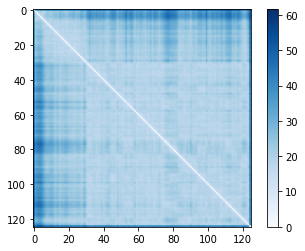

In [18]:
plt.imshow(dis_matrix, zorder=2, cmap='Blues')
plt.colorbar()

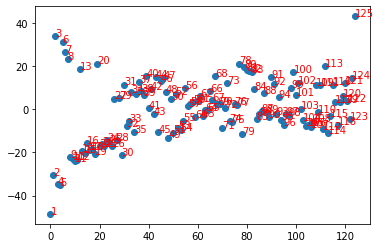

In [19]:
chans = [*range(1,126)]
chans = list(map(str, chans))

xaxis = list(range(125))
plt.scatter(xaxis,mds_coords)

for chans, x, y in zip(chans, xaxis, mds_coords):
    plt.annotate(chans, (x,y), xycoords = 'data', color='red')

In [20]:
labels_z = zip(mds_coords, xaxis)
labels_z = sorted(labels_z)

sort_idx = [x for _, x in labels_z]

sort_idx

[0,
 4,
 3,
 1,
 10,
 11,
 9,
 8,
 29,
 18,
 14,
 13,
 16,
 17,
 22,
 25,
 20,
 21,
 15,
 24,
 27,
 23,
 48,
 78,
 113,
 50,
 34,
 44,
 53,
 111,
 70,
 52,
 106,
 31,
 104,
 95,
 105,
 117,
 74,
 107,
 32,
 73,
 54,
 103,
 94,
 122,
 84,
 59,
 89,
 114,
 62,
 97,
 96,
 92,
 85,
 42,
 109,
 88,
 86,
 63,
 64,
 102,
 40,
 71,
 56,
 76,
 75,
 69,
 57,
 68,
 118,
 116,
 58,
 60,
 121,
 66,
 49,
 26,
 28,
 93,
 61,
 119,
 100,
 38,
 35,
 51,
 87,
 33,
 47,
 37,
 65,
 83,
 41,
 55,
 98,
 110,
 108,
 115,
 30,
 91,
 120,
 72,
 101,
 36,
 45,
 123,
 46,
 43,
 90,
 67,
 39,
 82,
 99,
 81,
 80,
 12,
 79,
 112,
 19,
 77,
 7,
 6,
 5,
 2,
 124]

In [21]:
sample = X_train[0]
print(sample.shape)

idx = np.random.permutation(125)
print(idx)
sample2 = np.take(sample,sort_idx,axis=1)
print(sample2.shape)
sample3 = np.take(sample, idx, axis=1)
print(sample3.shape)

(3750, 125)
[117  22 120  27 119  49  11 107  15  70  12  98  34  66  24   1  47  57
  33  77  20  83 104 110  53  62  78  84 112  64  93   4 102  80   5  43
 106  13  72  79  46 103  85 121  39  65   8 114 122  61  29  94  38  99
   3   0 118  44  48  69  71  60  96  75  17  40  59  19   6  36  32  37
  28 108  58 109  88  76 111  42  56 124  82  14  26  41  50  95  51 101
  30  21  81  92  52 123  18  67  73  31  89  91  90  54 100   9  97  23
 116   7   2 105  25  63  87  16 115  10  35 113  55  68  74  86  45]
(3750, 125)
(3750, 125)


In [24]:
font = {'family': 'Verdana', 
        'color':  'black', 
        'size': 13, 
        } 

Text(0.5, 0, 'Samples')

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


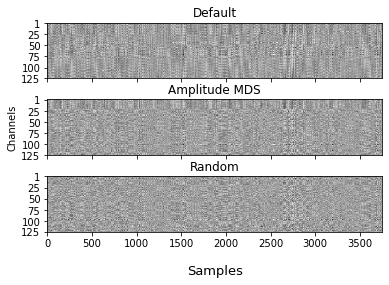

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True,)
#fig.suptitle('Aligning x-axis using sharex')
ax1.imshow(np.transpose(sample),cmap='Greys', aspect=5, interpolation='nearest'  )
ax1.set_title('Default')
plt.yticks([0.5,25.5,50.5,75.5,100.5,124.5],['1','25','50','75','100','125'])
ax2.imshow(np.transpose(sample2),cmap='Greys', aspect=5, interpolation='nearest'  )
ax2.set_title('Amplitude MDS')
ax3.imshow(np.transpose(sample3),cmap='Greys', aspect=5, interpolation='nearest'  )
ax3.set_title('Random')

ax2.set(ylabel='Channels',  )
plt.xlabel('Samples', fontdict=font, labelpad=16)

In [27]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train,num_classes=3) #ONLY for classification 
y_val = to_categorical(y_val,num_classes=3)
y_test = to_categorical(y_test,num_classes=3)

y_train = list(itertools.chain.from_iterable(itertools.repeat(x, 25) for x in y_train))
y_train = np.array(y_train)

y_val = list(itertools.chain.from_iterable(itertools.repeat(x, 25) for x in y_val))
y_val = np.array(y_val)

y_test = list(itertools.chain.from_iterable(itertools.repeat(x, 25) for x in y_test))
y_test = np.array(y_test)

# Load Behavioral Ratings

In [24]:
#The NMED-T dataset comes with corresponding participant ratings to each EEG recording 

ratings = np.genfromtxt('/content/drive/My Drive/EEG_DL/NMED_T/Xy_enj_ratings/enj_rating.csv', delimiter=',')

print(ratings)

[[8. 8. 5. 5. 9. 7. 6. 7. 5. 5.]
 [8. 8. 7. 5. 3. 7. 5. 5. 4. 4.]
 [8. 7. 8. 6. 8. 7. 7. 8. 7. 6.]
 [8. 7. 2. 7. 9. 6. 7. 7. 5. 7.]
 [6. 8. 6. 5. 7. 7. 8. 7. 7. 3.]
 [4. 5. 4. 5. 5. 5. 4. 4. 5. 1.]
 [6. 2. 2. 5. 3. 7. 3. 5. 3. 2.]
 [5. 8. 3. 7. 5. 6. 6. 6. 7. 4.]
 [7. 5. 6. 5. 6. 5. 4. 6. 3. 2.]
 [5. 4. 2. 7. 5. 6. 4. 7. 3. 1.]
 [7. 5. 2. 4. 7. 9. 7. 8. 6. 1.]
 [9. 6. 6. 8. 6. 7. 6. 8. 5. 6.]
 [6. 7. 5. 9. 7. 7. 6. 8. 3. 4.]
 [3. 5. 5. 6. 5. 6. 4. 6. 3. 2.]
 [7. 4. 4. 3. 5. 5. 3. 6. 3. 2.]
 [6. 5. 4. 6. 5. 5. 7. 6. 5. 2.]
 [5. 6. 4. 5. 7. 7. 4. 6. 5. 1.]
 [9. 7. 8. 9. 9. 9. 9. 9. 9. 3.]
 [7. 6. 6. 8. 5. 8. 5. 7. 8. 4.]
 [8. 8. 2. 6. 8. 9. 4. 6. 8. 1.]]


(array([ 5., 11., 15., 20.,  0., 40., 35., 37., 24., 13.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

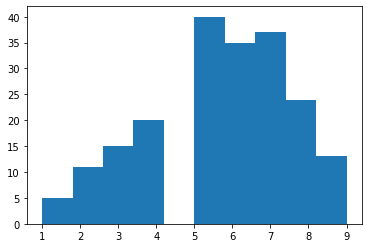

In [25]:
allratings = np.concatenate(ratings)
plt.hist(allratings)

In [26]:
#Reassign to a 3 scale to balance ratings distributions 

g1 = [1,2,3]
g2 = [4,5,6]
g3 = [7,8,9]

for i in range(len(allratings)):
  if allratings[i] in g1:
    allratings[i] = 0
  elif allratings[i] in g2:
    allratings[i] = 1
  else:
    allratings[i] = 2

y_train = allratings
y_val = allratings
y_test = allratings 
print(y_train)
y_train = np.concatenate([y_train]*4)
y_val = np.concatenate([y_val]*2)
y_test = np.concatenate([y_test]*2)

print(y_train.shape,y_val.shape,y_test.shape)

[2. 2. 1. 1. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 0. 2. 1. 1. 1. 1. 2. 2. 2. 1.
 2. 2. 2. 2. 2. 1. 2. 2. 0. 2. 2. 1. 2. 2. 1. 2. 1. 2. 1. 1. 2. 2. 2. 2.
 2. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 2. 0. 1. 0. 0. 1. 2.
 0. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 2. 1. 1.
 1. 2. 0. 0. 2. 1. 0. 1. 2. 2. 2. 2. 1. 0. 2. 1. 1. 2. 1. 2. 1. 2. 1. 1.
 1. 2. 1. 2. 2. 2. 1. 2. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 2. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 2. 1. 1. 0. 1. 1. 1. 1. 2. 2. 1. 1.
 1. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2. 1. 1. 2. 1. 2. 1. 2. 2. 1. 2. 2.
 0. 1. 2. 2. 1. 1. 2. 0.]
(800,) (400,) (400,)


# Band Pass

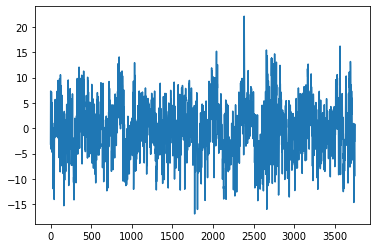

In [16]:
##BAND PASS##
from scipy.signal import butter, lfilter

plt.plot(X_train[0][:,0])

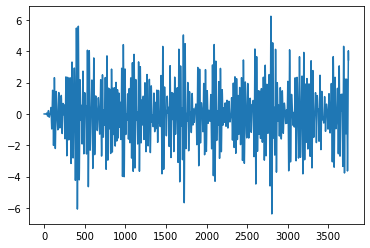

In [17]:
b, a = butter(8, [4,7], btype='band',fs=125)
y = lfilter(b, a, X_train[0][:,0])

plt.plot(y)

In [18]:
##Alpha Band Processing##

X_trainA = []
for i in range(len(X_train)):
  x = []
  for j in range(125):
    b, a = butter(8, [1,4], btype='band',fs=125)
    y = lfilter(b, a, X_train[i][:,j])
    x.append(np.array(y))
  X_trainA.append(np.transpose(np.array(x)))

X_trainA = np.array(X_trainA)
X_train = X_trainA
print(X_train.shape)
X_trainA = []


X_valA = []
for i in range(len(X_val)):
  x = []
  for j in range(125):
    b, a = butter(8, [1,4], btype='band',fs=125)
    y = lfilter(b, a, X_val[i][:,j])
    x.append(np.array(y))
  X_valA.append(np.transpose(np.array(x)))

X_valA = np.array(X_valA)
X_val = X_valA
print(X_val.shape)
X_valA = []


X_testA = []
for i in range(len(X_test)):
  x = []
  for j in range(125):
    b, a = butter(8, [1,4], btype='band',fs=125)
    y = lfilter(b, a, X_test[i][:,j])
    x.append(np.array(y))
  X_testA.append(np.transpose(np.array(x)))

X_testA = np.array(X_testA)
X_test = X_testA
print(X_test.shape)
X_testA = []

y = []
x = []
b = []
a = []

(800, 3750, 125)
(400, 3750, 125)
(400, 3750, 125)
